In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df_steam_games = pd.read_parquet('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TI_1/Datasets_para_Render/steam_games.parquet')
df_user_reviews = pd.read_parquet('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TI_1/Datasets_para_Render/user_reviews.parquet')
df_user_items = pd.read_parquet('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TI_1/Datasets_para_Render/users_items.parquet')



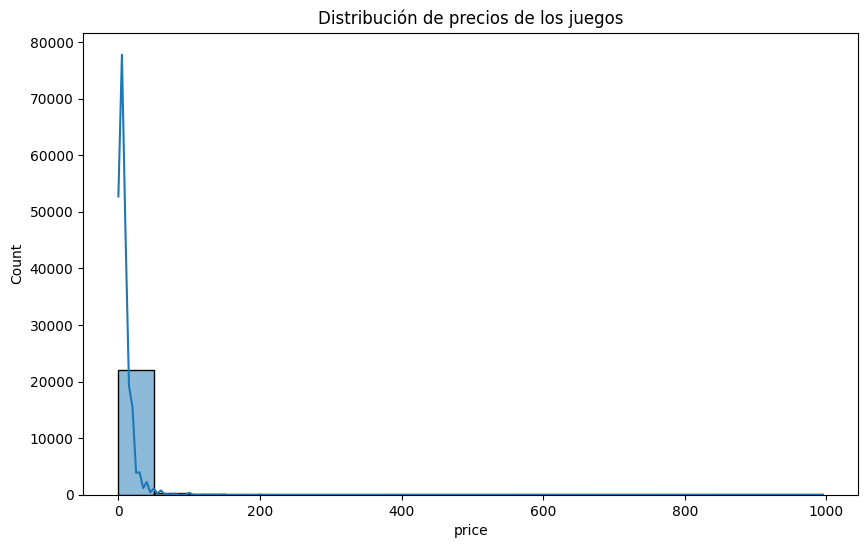

In [13]:
# Unir df_steam_games y df_user_items en 'item_id'
df_merged = pd.merge(df_steam_games, df_user_items[['item_id', 'playtime_forever']], on='item_id', how='left')

# Visualización de datos
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['price'], bins=20, kde=True)
plt.title("Distribución de precios de los juegos")
plt.show()




Análisis de la Gráfica
Distribución Asimétrica: La gráfica muestra que la mayoría de los precios de los juegos se encuentran concentrados en el rango de precios bajos. La distribución tiene una cola larga hacia la derecha, lo que indica que hay algunos juegos con precios mucho más altos.
Concentración de Datos: La gran cantidad de juegos tiene precios cercanos a cero, como se puede ver por el pico alto en ese rango.
Estimación de Densidad Kernel (KDE): La línea suave (KDE) superpuesta al histograma proporciona una visualización más clara de la distribución de los precios, mostrando la tendencia general de los datos.
Esta gráfica es útil para entender cómo están distribuidos los precios de los juegos en el dataset, destacando la gran cantidad de juegos de bajo precio y la existencia de algunos juegos más caros.

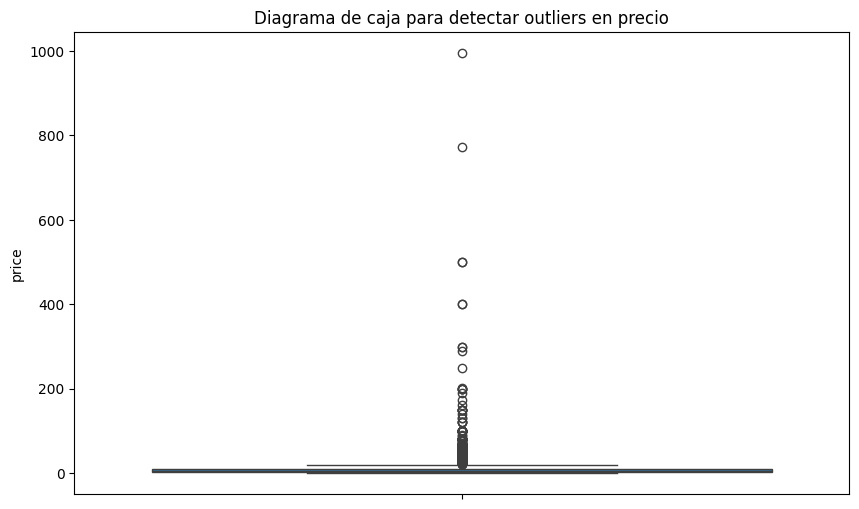

In [15]:
# Detección de valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged['price'])
plt.title("Diagrama de caja para detectar outliers en precio")
plt.show()





Análisis de la Gráfica
Diagrama de caja para detectar outliers en precio
Distribución de Precios: El diagrama de caja muestra la distribución de los precios de los juegos. La caja central representa el rango intercuartílico (IQR), es decir, el rango entre el primer cuartil (Q1) y el tercer cuartil (Q3), donde se encuentra el 50% de los datos.

Valores Atípicos (Outliers): Los círculos fuera de los bigotes de la caja representan los valores atípicos (outliers). Estos son precios que se encuentran significativamente alejados del resto de los datos. En este caso, hay numerosos outliers que llegan hasta precios muy altos, superando incluso los 1000 unidades monetarias.

Bigotes: Los bigotes se extienden hasta 1.5 veces el IQR desde los cuartiles. Cualquier punto fuera de este rango se considera un outlier.

Mediana y Rango: La línea dentro de la caja indica la mediana de los precios. La posición de la mediana, así como la extensión de la caja y los bigotes, proporciona una visión clara de la dispersión y la asimetría de los precios.

Este diagrama es útil para identificar y visualizar los valores atípicos en la distribución de precios, permitiendo un análisis más detallado y la toma de decisiones sobre cómo manejar estos outliers en análisis posteriores.

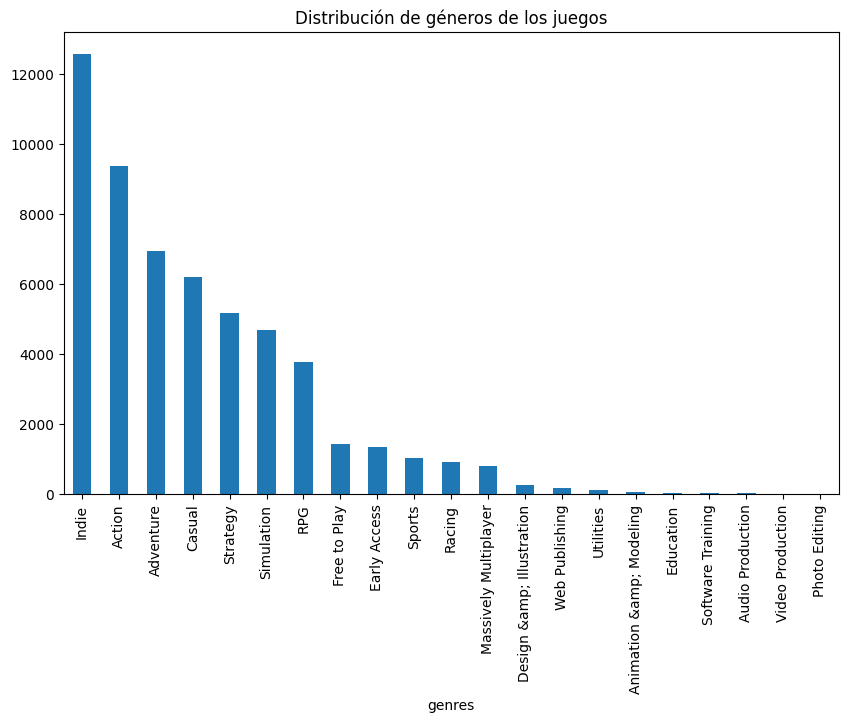

In [16]:
# Análisis de variables categóricas
plt.figure(figsize=(10, 6))
df_merged['genres'].explode().value_counts().plot(kind='bar')
plt.title("Distribución de géneros de los juegos")
plt.show()


Análisis de la Gráfica
Distribución de géneros de los juegos
Frecuencia de Géneros: La gráfica de barras muestra la distribución de los diferentes géneros de los juegos presentes en el dataset. Cada barra representa la cantidad de juegos que pertenecen a un género específico.

Géneros Más Comunes: Los géneros con las barras más largas son los más comunes en el dataset. Esto permite identificar qué tipos de juegos son más frecuentes.

Diversidad de Géneros: La variedad de géneros mostrados en la gráfica proporciona una visión de la diversidad dentro del catálogo de juegos.

Comparación Visual: La representación visual facilita la comparación entre los diferentes géneros, ayudando a detectar cuáles son los más populares y cuáles son menos frecuentes.

Esta gráfica es útil para entender la distribución y frecuencia de los géneros en el dataset, proporcionando insights valiosos sobre las preferencias y tendencias en los tipos de juegos disponibles.







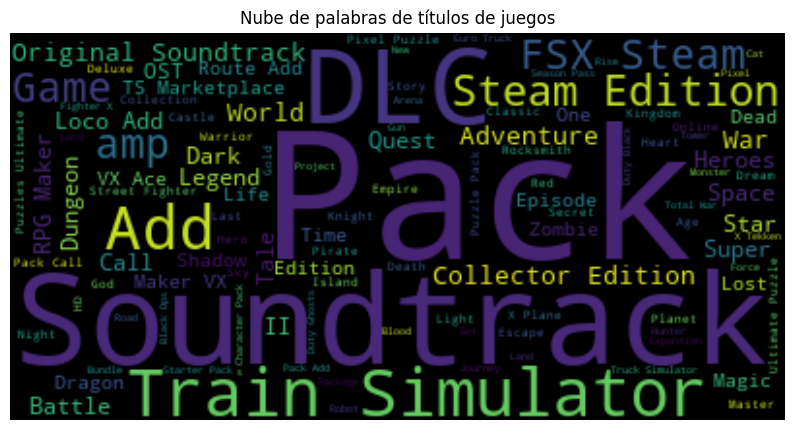

In [18]:
# Nube de palabras
text = ' '.join(df_merged['title'].astype(str))
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras de títulos de juegos")
plt.show()

Análisis de la Gráfica
Frecuencia de Palabras: Las palabras más grandes en la nube representan las palabras más frecuentemente usadas en los títulos de los juegos. Por ejemplo, "Pack", "DLC", "Soundtrack", y "Edition" son algunas de las palabras más prominentes, lo que indica que estos términos aparecen con frecuencia en los títulos de los juegos del dataset.
Variedad de Términos: La nube de palabras también muestra una variedad de términos relacionados con los juegos, como "Simulator", "Train", "Game", "Add", "Steam", entre otros.
Esta gráfica es útil para obtener una visión rápida de las palabras más comunes en los títulos de los juegos, lo que puede ayudar a identificar tendencias y patrones en los nombres de los juegos en el dataset.